In [3]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jody/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from nltk import word_tokenize, bigrams

sentence = 'I love data science and deep learning'
tokens = word_tokenize(sentence)

bgram = bigrams(tokens)
bgram_list = [x for x in bgram]
print(bgram_list)

# 튜플 형태로, bgram 형태

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]


In [7]:
from nltk.util import ngrams

tgram = ngrams(tokens, 3)
qgram = ngrams(tokens, 4)

tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('I', 'love', 'data'), ('love', 'data', 'science'), ('data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning')]
[('I', 'love', 'data', 'science'), ('love', 'data', 'science', 'and'), ('data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning')]


In [9]:
from nltk import ConditionalFreqDist

sentences = ['I love data science and deep learning', 'I love science', 'I know this code']

tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams:
    token += (x for x in i)
cfd = ConditionalFreqDist(token)
cfd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [10]:
print(cfd['I'])

<FreqDist with 2 samples and 3 outcomes>


In [11]:
print(cfd['I']['love']) # 두개가 붙어있는것이 두번 출현

0


In [12]:
print(cfd['I'].most_common(1)) # 'I'랑 붙어서 제일 많이 출현한것

[('love', 2)]


#### 동시출현을 행렬로 표현

In [13]:
import numpy as np

freq_matrix = []

for i in cfd.keys():
    temp = []
    for j in cfd.keys():
        temp.append(cfd[i][j])
    freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix)

print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this', 'i'])
[[0 2 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


#### 동시 출현 빈도 데이터프레임

In [14]:
import pandas as pd

df = pd.DataFrame(freq_matrix, index = cfd.keys(), columns = cfd.keys())
df.style.background_gradient(cmap = 'coolwarm')

,I,love,data,science,and,deep,know,this,i
I,0,2,0,0,0,0,1,0,0
love,0,0,1,1,0,0,0,0,0
data,0,0,0,1,0,0,0,0,0
science,0,0,0,0,1,0,0,0,0
and,0,0,0,0,0,1,0,0,0
deep,0,0,0,0,0,0,0,0,0
know,0,0,0,0,0,0,0,1,0
this,0,0,0,0,0,0,0,0,0
i,0,0,0,0,0,0,0,0,0


In [16]:
import networkx as nx

G = nx. 

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this', 'i']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


#### edge에 가중치 값이 들어가있음

In [17]:
print(G.edges()[('I', 'love')]) # 두번 등장해서 가중치가 2
print(G.edges()[('I', 'know')]) # 한번 등장해서 가중치가 1

{'weight': 2}
{'weight': 1}


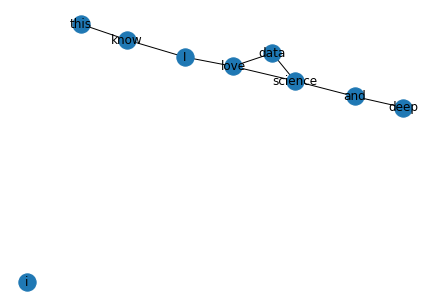

In [18]:
nx.draw(G, with_labels= True)

### 동시 출현 확률 측정

In [19]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
cpd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this', 'i']

In [21]:
prob_matrix = []

for i in cpd.keys():
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])
    
prob_matrix = np.array(prob_matrix)

print(cpd.keys())
print(prob_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this', 'i'])
[[0.         0.66666667 0.         0.         0.         0.
  0.33333333 0.         0.        ]
 [0.         0.         0.5        0.5        0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


In [22]:
df = pd.DataFrame(prob_matrix, index = cpd.keys(), columns=cpd.keys())
df.style.background_gradient(cmap = 'coolwarm')

,I,love,data,science,and,deep,know,this,i
I,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
love,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
data,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
deep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
this,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())
print(prob_G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this', 'i']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


In [24]:
print(G.edges()[('I', 'love')])
print(G.edges()[('I', 'know')])

print(prob_G.edges()[('I', 'love')])
print(prob_G.edges()[('I', 'know')])

{'weight': 2}
{'weight': 1}
{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


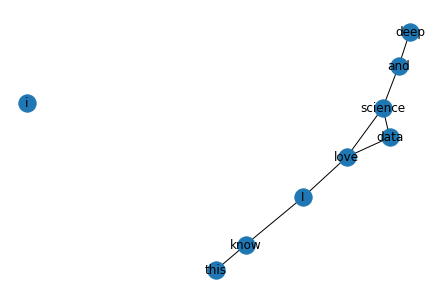

In [25]:
nx.draw(prob_G, with_labels= True)

In [26]:
nx.degree_centrality(G)

{'I': 0.25,
 'love': 0.375,
 'data': 0.25,
 'science': 0.375,
 'and': 0.25,
 'deep': 0.125,
 'know': 0.25,
 'this': 0.125,
 'i': 0.0}

### 위세 중심성
#### - 연결된 상대 단어의 중요성에 가중치를 둠

In [27]:
nx.eigenvector_centrality(G, weight= 'weight')

{'I': 0.5055042648573065,
 'love': 0.6195557831651917,
 'data': 0.35703593885196566,
 'science': 0.39841035839294925,
 'and': 0.15933837227495717,
 'deep': 0.055886131430398216,
 'know': 0.20216573350291445,
 'this': 0.07090581134630142,
 'i': 3.726204087562662e-15}

### 근접 중심성
#### - 한 단어가 다른 단어에 얼마나 가깝게 있는지를 측정하는 지표

In [28]:
nx.closeness_centrality(G, distance='weight')

{'I': 0.30624999999999997,
 'love': 0.3828125,
 'data': 0.3223684210526316,
 'science': 0.3602941176470588,
 'and': 0.29166666666666663,
 'deep': 0.22685185185185183,
 'know': 0.25520833333333337,
 'this': 0.20416666666666666,
 'i': 0.0}

### 매개 중심성
#### - 한 단어가 단어들과의 연결망을 구축하는데 얼마나 도음을 주는지 측정하는 지표

In [29]:
nx.betweenness_centrality(G)

{'I': 0.3571428571428571,
 'love': 0.42857142857142855,
 'data': 0.0,
 'science': 0.3571428571428571,
 'and': 0.21428571428571427,
 'deep': 0.0,
 'know': 0.21428571428571427,
 'this': 0.0,
 'i': 0.0}

### PageRank
#### - 웹과 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법

In [30]:
nx.pagerank(G)

{'I': 0.1508530392484172,
 'love': 0.19142450609119482,
 'data': 0.10288937806402959,
 'science': 0.1546126684901673,
 'and': 0.1218884745785058,
 'deep': 0.07020724314978419,
 'know': 0.12022144782401037,
 'this': 0.06949833457843065,
 'i': 0.018404907975460127}

In [31]:
def get_node_size(node_values):
    nsize = np.array([v for v in node_values])
    nsize = 1000 * (nsize - min(nsize)) / (max(nsize)- min(nsize))
    return nsize

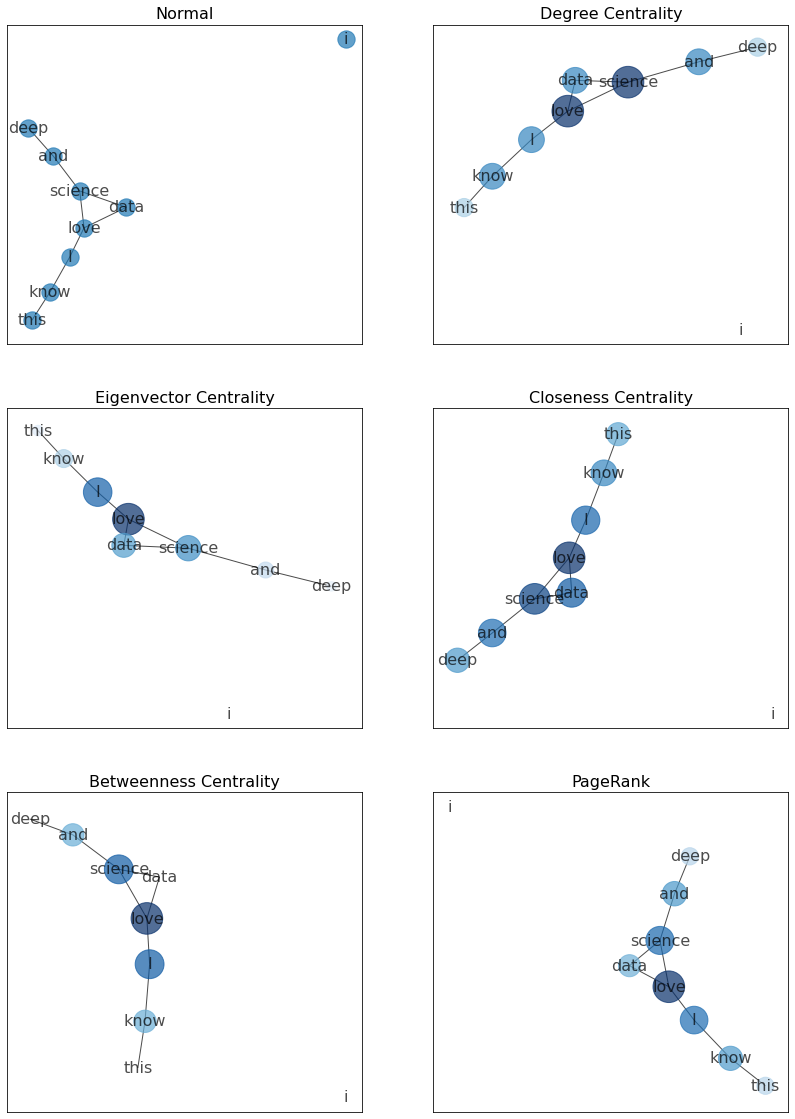

In [39]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whtie')

dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight='weight').values()
cc = nx.closeness_centrality(G, distance='weight').values()
bc = nx.betweenness_centrality(G).values()
pr = nx.pagerank(G).values()

plt.figure(figsize=(14,20))
plt.axis('off')

plt.subplot(321)
plt.title('Normal', fontsize= 16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)


plt.subplot(322)
plt.title('Degree Centrality', fontsize= 16)
nx.draw_networkx(G, font_size=16,
                node_color=list(dc), node_size=get_node_size(dc),
                alpha=0.7, cmap = plt.cm.Blues)

plt.subplot(323)
plt.title('Eigenvector Centrality', fontsize= 16)
nx.draw_networkx(G, font_size=16,
                node_color=list(ec), node_size=get_node_size(ec),
                alpha=0.7, cmap = plt.cm.Blues)

plt.subplot(324)
plt.title('Closeness Centrality', fontsize= 16)
nx.draw_networkx(G, font_size=16,
                node_color=list(cc), node_size=get_node_size(cc),
                alpha=0.7, cmap = plt.cm.Blues)

plt.subplot(325)
plt.title('Betweenness Centrality', fontsize= 16)
nx.draw_networkx(G, font_size=16,
                node_color=list(bc), node_size=get_node_size(bc),
                alpha=0.7, cmap = plt.cm.Blues)

plt.subplot(326)
plt.title('PageRank', fontsize= 16)
nx.draw_networkx(G, font_size=16,
                node_color=list(pr), node_size=get_node_size(pr),
                alpha=0.7, cmap = plt.cm.Blues)
plt.show()